In [183]:
from ucimlrepo import fetch_ucirepo
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
import matplotlib.pyplot as plt
#%matplotlib

In [184]:
class Model(nn.Module):
    def __init__(self, in_features=6, h1=16, h2=8, h3=4, out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # passes input to layer 1
        self.fc2 = nn.Linear(h1, h2) # passes layer 1 to layer 2
        self.fc3 = nn.Linear(h2, h3) # passes layer 2 to layer 3
        self.out = nn.Linear(h3, out_features) # passes layer 3 to output

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x

In [185]:
# Set manual seed for randomizing
torch.manual_seed(42)
# Instantiate model
model = Model()

In [186]:
# Specify what is relevant data
data = "dataset/parkinsons.data"
selected_features = ['status', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'RPDE', 'PPE']

# load dataset
df = pd.read_csv(data)
df = df[selected_features]
print(df.iloc[155])


status              1.000000
MDVP:Fo(Hz)       117.870000
MDVP:Jitter(%)      0.006470
MDVP:Shimmer        0.030870
NHR                 0.026310
RPDE                0.628300
PPE                 0.206256
Name: 155, dtype: float64


In [187]:
# set x and y parameters
x = df.drop(columns=['status']) # input variables
y = df['status'] # target variable - binary value to determine if subject has parkinsons or not

# Convert x and y to numpy arrays
x = x.values
y = y.values

In [188]:
# train test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale x values
x_train = scalar.fit_transform(x_train) # Fit on train, transform train
x_test = scalar.transform(x_test) # Transform test using train scaler

# Convert x values to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# For classification: y is usually left as integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [189]:
# Measure error
criterion = nn.CrossEntropyLoss()
# define optimiser and set learning rate
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [191]:
# train model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)

    # measure loss
    loss=criterion(y_pred, y_train) # the loss is determined at the differende between predicted and trained values
    losses.append(loss.item()) # append loss to a list

    # output every 10 epochs
    if i % 10 == 0:
        print(f"Epoch count: {i} loss: {loss.item()}")

    optimiser.zero_grad # rests gradients of model parameters to zero to enhance accuracy
    loss.backward() # computes gradients of loss according to each model's parameters using backpropagation algorithm
    optimiser.step() # updates model paramemeters using gradient computed in loss.backward()

Epoch count: 0 loss: 0.7005883455276489
Epoch count: 10 loss: 0.6933759450912476
Epoch count: 20 loss: 0.6836816072463989
Epoch count: 30 loss: 0.6705209016799927
Epoch count: 40 loss: 0.6528934240341187
Epoch count: 50 loss: 0.6320486068725586
Epoch count: 60 loss: 0.6083197593688965
Epoch count: 70 loss: 0.582001805305481
Epoch count: 80 loss: 0.553573727607727
Epoch count: 90 loss: 0.5242205858230591


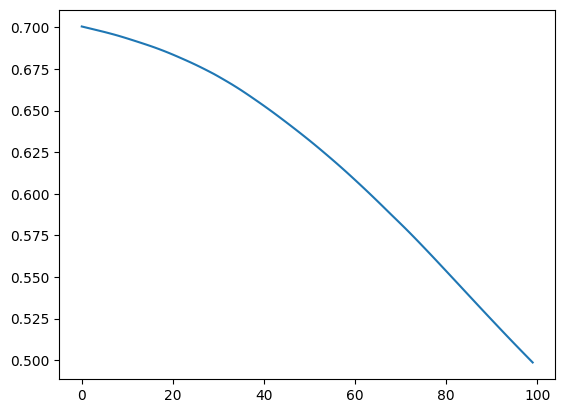

In [192]:
# visualise results

plt.plot(range(epochs), losses)
plt.ylabel=("error")
plt.xlabel=("Epoch")

In [193]:
# Evaluate model on test data set
with torch.no_grad(): # Turn off back propogation
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test) # find error
    print(loss)

tensor(0.4769)


In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "healthy"
    elif y_test[i] == 1:
      x = 'parkinsons'
    
     # Find out what flower class the model thinks it is
    print(f"{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # If it is correct
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f"{correct} correct!")

1.)  tensor([-1.2645, -0.0152]) 	 1 	 1
2.)  tensor([-0.8674, -0.2248]) 	 1 	 1
3.)  tensor([-0.9852, -0.1681]) 	 1 	 1
4.)  tensor([-0.7148, -0.3035]) 	 1 	 1
5.)  tensor([-1.2543, -0.0174]) 	 1 	 1
6.)  tensor([-0.8589, -0.2332]) 	 1 	 1
7.)  tensor([-1.2564, -0.0201]) 	 1 	 1
8.)  tensor([-0.7767, -0.2742]) 	 1 	 1
9.)  tensor([-1.0571, -0.1183]) 	 1 	 1
10.)  tensor([-0.7073, -0.3082]) 	 1 	 1
11.)  tensor([-0.9303, -0.1987]) 	 0 	 1
12.)  tensor([-1.7742,  0.2626]) 	 1 	 1
13.)  tensor([-0.9173, -0.2005]) 	 1 	 1
14.)  tensor([-0.9293, -0.1906]) 	 1 	 1
15.)  tensor([-1.4284,  0.0613]) 	 1 	 1
16.)  tensor([-0.8874, -0.2170]) 	 1 	 1
17.)  tensor([-1.0202, -0.1337]) 	 1 	 1
18.)  tensor([-0.7161, -0.3067]) 	 1 	 1
19.)  tensor([-1.0366, -0.1519]) 	 0 	 1
20.)  tensor([-0.7200, -0.3061]) 	 1 	 1
21.)  tensor([-1.0714, -0.1179]) 	 1 	 1
22.)  tensor([-0.7632, -0.2753]) 	 1 	 1
23.)  tensor([-0.9749, -0.1647]) 	 1 	 1
24.)  tensor([-0.6704, -0.3144]) 	 0 	 1
25.)  tensor([-1.1902, -0

In [195]:
new_sample = torch.tensor([150.5, 0.004, 0.035, 0.012, 0.56, 0.42]) 


In [196]:
# feed model new data and apply softmax function to derive probabilities
with torch.no_grad():
    pred_tensor = model(new_sample) # raw data
    probabilities = F.softmax(pred_tensor, dim=0)  # Normalize to probabilities
    pred_index = torch.argmax(probabilities)

    # convert probs to array
    prob_array = probabilities.numpy()

    # access probabilities and convert to percentage
    prob_healthy = prob_array[0] * 100
    prob_parkinsons = prob_array[1] * 100

    print(f"probability of healthy: {prob_healthy}%")
    print(f"probability of parkinsons: {prob_parkinsons}%")

    if prob_healthy > prob_parkinsons:
        print("Patient is most likely healthy")
    else:
        print("Patient most likely has parkinsons")

probability of healthy: 0.03386535122990608%
probability of parkinsons: 99.96613311767578%
Patient most likely has parkinsons
